In [1]:
pwd

'C:\\Users\\17173'

In [56]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/BRstats.csv')

print(df.head())


     year    GP     AB     R     H    2B    3B    HR  RBI    BB  HBP    SO  \
0  1914.0   5.0   10.0   1.0   2.0   1.0   0.0   0.0  0.0   0.0  0.0   4.0   
1  1915.0  42.0   92.0  16.0  29.0  10.0   1.0   4.0  0.0   9.0  0.0  23.0   
2  1916.0  67.0  136.0  18.0  37.0   5.0   3.0   3.0  0.0  10.0  0.0  23.0   
3  1917.0  52.0  123.0  14.0  40.0   6.0   3.0   2.0  0.0  12.0  0.0  18.0   
4  1918.0  95.0  317.0  50.0  95.0  26.0  11.0  11.0  0.0  57.0  2.0  58.0   

    SB   CS    AVG    OBP    SLG    OPS  WAR  
0  0.0  0.0  0.200  0.200  0.300  0.500  0.0  
1  0.0  0.0  0.315  0.376  0.576  0.952  0.0  
2  0.0  0.0  0.272  0.322  0.419  0.741  0.0  
3  0.0  0.0  0.325  0.385  0.472  0.857  0.0  
4  6.0  0.0  0.300  0.410  0.555  0.965  0.0  


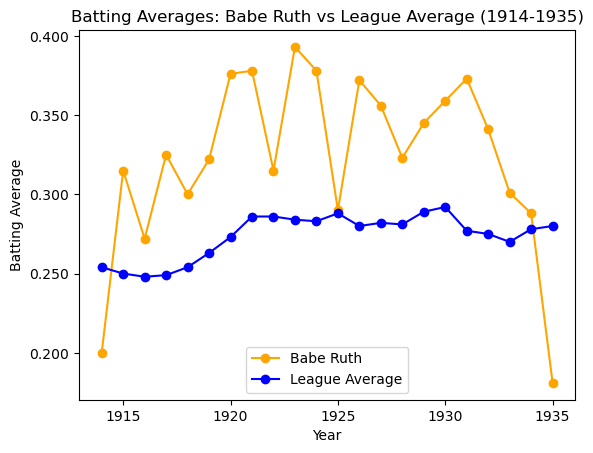

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

babe_ruth_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/BRstats.csv')
league_avg_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/all%20average%20BA.csv', header=1)


babe_ruth_df = babe_ruth_df.dropna(subset=['AVG'])
league_avg_df = league_avg_df.dropna(subset=['BA'])

#changes to an integer instead of a string
babe_ruth_df = babe_ruth_df[pd.to_numeric(babe_ruth_df['year'], errors='coerce').notnull()]
league_avg_df = league_avg_df[pd.to_numeric(league_avg_df['Year'], errors='coerce').notnull()]

babe_ruth_df['year'] = babe_ruth_df['year'].astype(int)
league_avg_df['Year'] = league_avg_df['Year'].astype(int)

babe_ruth_df = babe_ruth_df[(babe_ruth_df['year'] >= 1914) & (babe_ruth_df['year'] <= 1935)]
league_avg_df = league_avg_df[(league_avg_df['Year'] >= 1914) & (league_avg_df['Year'] <= 1935)]

babe_ruth_selected = babe_ruth_df[['year', 'AVG']].rename(columns={'AVG': 'Babe_Ruth_AVG', 'year': 'Year'})
league_avg_selected = league_avg_df[['Year', 'BA']].rename(columns={'BA': 'League_AVG'})

merged_df = babe_ruth_selected.merge(league_avg_selected, on='Year')

# puts into numeric values
merged_df['Babe_Ruth_AVG'] = pd.to_numeric(merged_df['Babe_Ruth_AVG'], errors='coerce')
merged_df['League_AVG'] = pd.to_numeric(merged_df['League_AVG'], errors='coerce')

babe_ruth_averages = merged_df['Babe_Ruth_AVG']
league_averages = merged_df['League_AVG']
years = merged_df['Year']

plt.plot(years, babe_ruth_averages, label='Babe Ruth', marker='o', color='orange')
plt.plot(years, league_averages, label='League Average', marker='o', color='blue')

plt.title('Batting Averages: Babe Ruth vs League Average (1914-1935)')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.legend()

formatter = FuncFormatter(lambda x, _: f'{x:.3f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

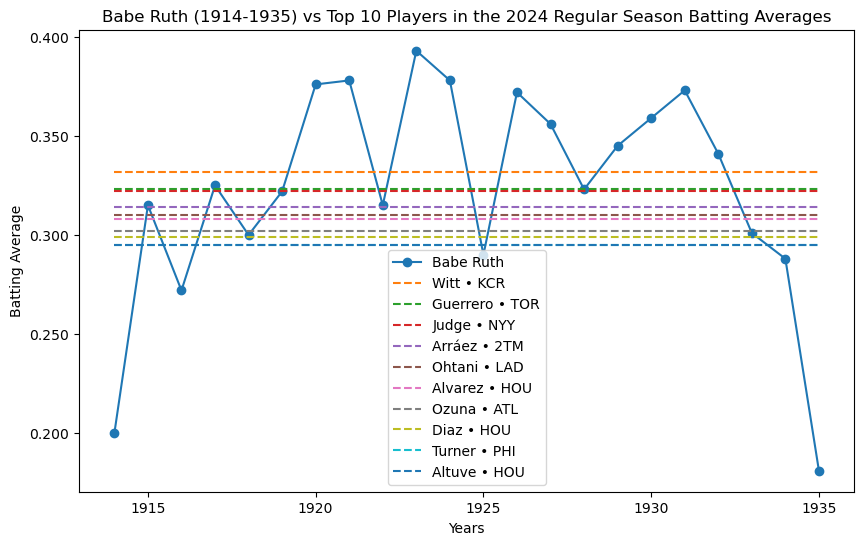

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

babe_ruth_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/BRstats.csv')
top_5_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/w01-2-adefriece/refs/heads/main/top5.csv')

plt.figure(figsize=(10, 6))
plt.plot(babe_ruth_df['year'], babe_ruth_df['AVG'], label="Babe Ruth", marker='o')

for index, row in top_5_df.iterrows():
    plt.plot(babe_ruth_df['year'], [row['AVG']] * len(babe_ruth_df['year']), label=row['player'], linestyle='--')
plt.xlabel("Years")
plt.ylabel("Batting Average")
plt.title("Babe Ruth (1914-1935) vs Top 10 Players in the 2024 Regular Season Batting Averages")
plt.legend()

formatter = FuncFormatter(lambda x, _: f'{x:.3f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [91]:
Leaguedf.columns

Index(['Year', 'Tms', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '1B',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'BIP'],
      dtype='object')

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/worldseries.csv')
print(df.head())


         Column1       Column2  \
0         Player  Years Played   
1    Yogi Berra*     1946-1965   
2  Joe DiMaggio*     1936-1951   
3   Bill Dickey*     1928-1946   
4  Phil Rizzuto*     1941-1956   

                                             Column3  \
0  Times on regular-season roster of WS winning team   
1                                                 10   
2                                                  9   
3                                                  8   
4                                                  8   

                                 Column4  \
0  Times appeared in WS for winning team   
1                                     10   
2                                      9   
3                                      7   
4                                      7   

                                   Column5  
0                         Teams Played For  
1  NYY,NYY,NYY,NYY,NYY,NYY,NYY,NYY,NYY,NYY  
2      NYY,NYY,NYY,NYY,NYY,NYY,NYY,NYY,NYY  
3          NY

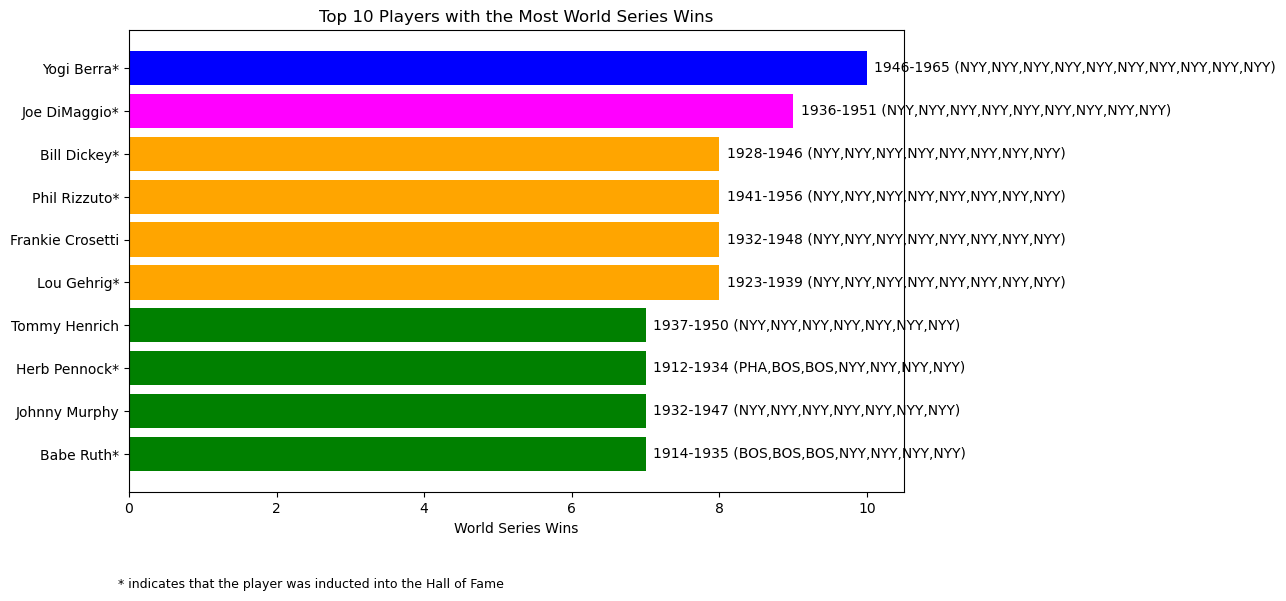

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/worldseries.csv')

df.columns = ['Player', 'Years Played', 'Times on regular-season roster of WS winning team','Times appeared in WS for winning team', 'Teams Played For']

#puts into a numeric value
df['Times on regular-season roster of WS winning team'] = pd.to_numeric(df['Times on regular-season roster of WS winning team'], errors='coerce')

top_10_players = df.sort_values(by='Times on regular-season roster of WS winning team', ascending=False).head(10)

color_map = {
    10: 'blue',
    9: 'magenta',
    8: 'orange',
    7: 'green'}

colors = top_10_players['Times on regular-season roster of WS winning team'].map(color_map)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_players['Player'], top_10_players['Times on regular-season roster of WS winning team'], color=colors)
plt.xlabel('World Series Wins')
plt.title('Top 10 Players with the Most World Series Wins')

#placement for the text
for bar, (index, row) in zip(bars, top_10_players.iterrows()):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{row["Years Played"]} ({row["Teams Played For"]})', va='center')

plt.gca().invert_yaxis() 

plt.figtext(0.5, -0.05, '* indicates that the player was inducted into the Hall of Fame', ha='right', fontsize=9)

plt.show()

In [270]:
import pandas as pd

# Load the data from the CSV file
url = 'https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/topHR.csv'
df = pd.read_csv(url)

# Display the column names and the first few rows of the dataframe
print(df.columns)
print(df.head())

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6'], dtype='object')
  Column1             Column2    Column3 Column4 Column5 Column6
0    Rank   Player (yrs, age)  Home Runs      PA    Bats  HR Log
1      1.    Barry Bonds (22)        762   12606       L  HR Log
2      2.   Henry Aaron+ (23)        755   13941       R  HR Log
3      3.     Babe Ruth+ (22)        714   10628       L  HR Log
4      4.  Albert Pujols (22)        703   13041       R  HR Log


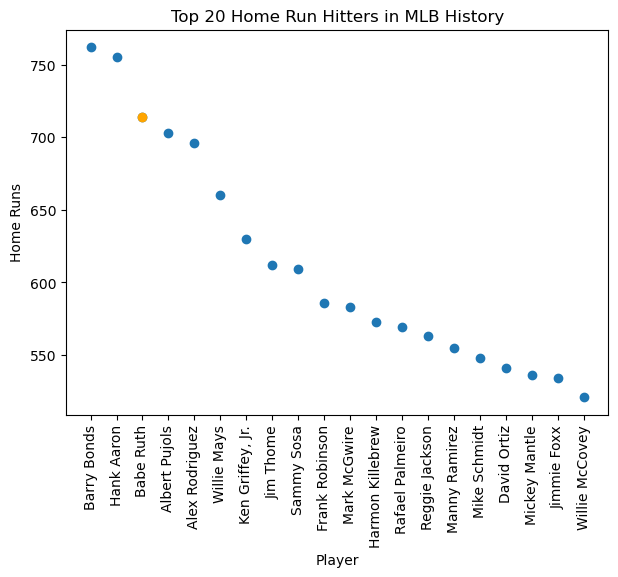

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/HR.csv')

df.columns = ['Name', 'HomeRuns', 'Rank']
df = df.drop(0)

df = df[pd.to_numeric(df['HomeRuns'], errors='coerce').notnull()]
df['HomeRuns'] = pd.to_numeric(df['HomeRuns'])

top_20_df = df.head(20)

plt.figure(figsize=(7,5))
plt.scatter(top_20_df['Name'], top_20_df['HomeRuns'])
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Home Runs')
plt.title('Top 20 Home Run Hitters in MLB History')

plt.scatter(top_20_df[top_20_df['Name'] == 'Babe Ruth']['Name'], top_20_df[top_20_df['Name'] == 'Babe Ruth']['HomeRuns'], color='orange', label='Babe Ruth')

# Display the plot
plt.show()


In [347]:
import pandas as pd

# Read the CSV file from the URL
df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/HR.csv')

# Display the first few rows of the dataframe to check the column names
print(df.head())

                                     Column1  \
0  Home Runs\nAll Time Leaders | 'Top 1,000'   
1                                       Name   
2                                Barry Bonds   
3                                 Hank Aaron   
4                                  Babe Ruth   

                                     Column2  \
0  Home Runs\nAll Time Leaders | 'Top 1,000'   
1                                  Home Runs   
2                                        762   
3                                        755   
4                                        714   

                                     Column3  
0  Home Runs\nAll Time Leaders | 'Top 1,000'  
1                                       Rank  
2                                          1  
3                                          2  
4                                          3  


In [5]:
Babedf

,year,GP,AB,R,H,2B,3B,HR,RBI,BB,HBP,SO,SB,CS,AVG,OBP,SLG,OPS,WAR
0,1914.0,5.0,10.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.200,0.200,0.300,0.500,0.0
1,1915.0,42.0,92.0,16.0,29.0,10.0,1.0,4.0,0.0,9.0,0.0,23.0,0.0,0.0,0.315,0.376,0.576,0.952,0.0
2,1916.0,67.0,136.0,18.0,37.0,5.0,3.0,3.0,0.0,10.0,0.0,23.0,0.0,0.0,0.272,0.322,0.419,0.741,0.0
3,1917.0,52.0,123.0,14.0,40.0,6.0,3.0,2.0,0.0,12.0,0.0,18.0,0.0,0.0,0.325,0.385,0.472,0.857,0.0
4,1918.0,95.0,317.0,50.0,95.0,26.0,11.0,11.0,0.0,57.0,2.0,58.0,6.0,0.0,0.300,0.410,0.555,0.965,0.0
5,1919.0,130.0,432.0,103.0,139.0,34.0,12.0,29.0,0.0,101.0,6.0,58.0,7.0,0.0,0.322,0.456,0.657,1.114,0.0
6,1920.0,142.0,458.0,158.0,172.0,36.0,9.0,54.0,137.0,148.0,3.0,80.0,14.0,14.0,0.376,0.530,0.847,1.378,11.6
7,1921.0,152.0,540.0,177.0,204.0,44.0,16.0,59.0,171.0,144.0,4.0,81.0,17.0,13.0,0.378,0.512,0.846,1.358,12.6
8,1922.0,110.0,406.0,94.0,128.0,24.0,8.0,35.0,99.0,84.0,1.0,80.0,2.0,5.0,0.315,0.434,0.672,1.106,6.0
9,1923.0,152.0,522.0,151.0,205.0,45.0,13.0,41.0,131.0,170.0,4.0,93.0,17.0,21.0,0.393,0.545,0.764,1.309,13.7


In [41]:
Leaguedf

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30
0,Year,Tms,#Bat,BatAge,R/G,G,PA,AB,R,H,...,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,BIP
1,2024,30,741,27.9,4.39,4858,37.56,33.69,4.39,8.20,...,.312,.399,.711,13.45,0.66,0.42,0.09,0.26,0.10,24.35
2,2023,30,765,28.0,4.62,4860,37.88,33.83,4.62,8.40,...,.320,.414,.734,14.01,0.71,0.43,0.09,0.25,0.10,24.26
3,2022,30,790,28.2,4.28,4860,37.46,33.63,4.28,8.16,...,.312,.395,.706,13.28,0.70,0.42,0.08,0.25,0.10,24.41
4,2021,30,1373,28.4,4.53,4858,37.43,33.33,4.53,8.13,...,.317,.411,.728,13.69,0.69,0.43,0.16,0.24,0.14,23.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Year,Tms,#Bat,BatAge,R/G,G,PA,AB,R,H,...,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,BIP
157,1874,8,120,25.0,7.48,464,41.69,41.17,7.48,11.26,...,.282,.333,.616,13.72,0.23,NaN,NaN,NaN,NaN,40.31
158,1873,9,122,24.1,8.99,398,43.45,42.61,8.99,12.38,...,.304,.357,.661,15.22,0.31,NaN,NaN,NaN,NaN,41.79
159,1872,11,143,23.5,9.26,366,43.52,42.80,9.26,12.20,...,.297,.348,.645,14.89,0.27,NaN,NaN,NaN,NaN,41.98


In [143]:
# Inspect the column names to identify the correct column for batting averages
print(top_5_df.columns)

# Extract the first 5 rows of the top 5 hitters
top_5_hitters = top_5_df.head(5)

# Display the extracted data
print(top_5_hitters)

Index(['Player\n                \n                                                        \n                            Player on team',
       'GP\n                            Games played',
       'AVG\n                            Batting Average',
       'AB\n                            At Bats',
       'R\n                            Runs',
       'H\n                            Hits',
       '2B\n                            Doubles',
       '3B\n                            Triples',
       'HR\n                            Home Runs',
       'RBI\n                            Runs Batted In',
       'SB\n                            Stolen Bases',
       'CS\n                            Caught Stealing',
       'BB\n                            Base on Balls (Walk)',
       'SO\n                            Strikeouts',
       'OBP\n                            On Base Percentage',
       'SLG\n                            Slugging Percentage',
       'OPS\n                            On